<a href="https://colab.research.google.com/github/Daim-Nickel-Penny/Fly-Deals-Backend/blob/main/Fly_Deals_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Bringing the data from kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [35]:
!kaggle datasets download -d promptcloud/easemytrip-flight-fare-details-2020

easemytrip-flight-fare-details-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!unzip -qq -o /content/easemytrip-flight-fare-details-2020.zip

In [37]:
import pandas as pd
import numpy as np

In [38]:
flight_data=pd.read_csv("Flight-Data.csv")

In [39]:
flight_data.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0
3,26135ec458c4204ddf036eae4119dd90,2020-02-01 00:33:23 +0000,Nagpur,Mumbai,Goa,NaN,Pune,Air India|Air India|Air India,AI-630|AI-33|AI-9562,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0
4,c29198e6745d72220af30969f05a7841,2020-01-01 00:18:01 +0000,Mumbai,Hyderabad,NaN,NaN,Varanasi,Indigo|Indigo,6E-5384|6E-915,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0


In [40]:
import datetime as dt

In [41]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30024 non-null  object 
 1   Crawl Timestamp  30024 non-null  object 
 2   Source           30024 non-null  object 
 3   Layover1         28720 non-null  object 
 4   Layover2         11242 non-null  object 
 5   Layover3         7 non-null      object 
 6   Destination      30024 non-null  object 
 7   Flight Operator  30024 non-null  object 
 8   Flight Number    30024 non-null  object 
 9   Departure Date   30024 non-null  object 
 10  Departure Time   30024 non-null  object 
 11  Arrival Date     30024 non-null  object 
 12  Arrival Time     30024 non-null  object 
 13  Total Time       30024 non-null  object 
 14  Number Of Stops  30024 non-null  int64  
 15  Fare             30024 non-null  float64
dtypes: float64(1), int64(1), object(14)
memory usage: 3.7+ MB


In [42]:
flight_data.shape

(30024, 16)

In [43]:
#As unique Id is of no use for getting any valid information as it is unqiue for each
#case and is of no use 

In [44]:
# flight_data.drop(["Uniq Id"], axis=1,inplace=True)
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0


In [45]:
flight_data["Source"].unique()

array(['Dubai', 'Delhi', 'Mumbai', 'Nagpur', 'Jeddah', 'Kochi', 'Bhopal',
       'Don Mueang', 'Riyadh', 'Bengaluru', 'Guwahati', 'Amritsar',
       'Kualalumpur', 'Vadodara', 'Brusells', 'Dehra Dun', 'Hong Kong',
       'Birmingham', 'Kolkata', 'Kozhikode', 'Chicago', 'Hyderabad',
       'Bhubaneswar', 'Johannesberg', 'Paris', 'Chandigarh', 'Ahmedabad',
       'Singapore', 'Bangkok', 'Abudhabi', 'Leipzig', 'Al Ain',
       'Coimbatore', 'Jammu', 'Chittagong', 'Trivandrum', 'Dammam',
       'Dhaka', 'Bahrain', 'Jaipur', 'Chennai', 'London', 'Pune',
       'Addis Ababa', 'Madurai', 'Mangalore', 'Frankfurt', 'Colombo',
       'Guangzhou', 'Port Blair', 'Newark', 'Jodhpur', 'Vancouver',
       'Agartala', 'Kuwait', 'Copenhagen', 'Goa', 'Udaipur', 'Lucknow',
       'Amsterdam', 'Cairo', 'Almaty', 'Moscow', 'Istanbul', 'Muenchen',
       'Hubli', 'Ashgabat', 'Allahabad', 'Tokyo', 'Indore', 'Tirupati',
       'Raipur', 'Patna', 'Aizawl', 'Maruitius', 'Bagdogra', 'Cologne',
       'Imphal', '

In [46]:
flight_data["Flight Operator"].value_counts()

Air India|Air India|Air India                        5581
Air India|Air India                                  3810
Indigo|Indigo                                        3434
Vistara|Vistara                                      1453
Emirates Airlines|Emirates Airlines                  1099
                                                     ... 
MH|MH|Vistara                                           1
Saudi Arabian Airlines|Emirates Airlines|Vistara        1
Royal Air Maroc|Etihad Airways|SriLankan Airlines       1
Flybe|Virgin Atlantic Airways                           1
Asiana Airlines|Asiana Airlines|Air India               1
Name: Flight Operator, Length: 679, dtype: int64

In [90]:
data=flight_data.groupby("Source")["Uniq Id"].agg({"count"})

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt


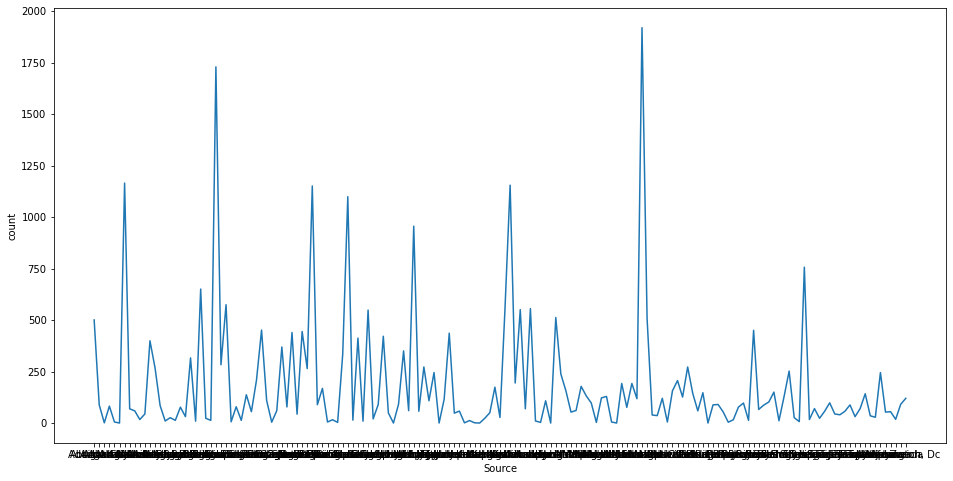

In [96]:
plt.figure(figsize=(16,8))
sns.lineplot(data=data, x="Source",y="count" )

In [52]:
#data= data.sort_values(by="count",  ascending=False)

In [53]:
data

,count
Source,
Mumbai,1919
Bengaluru,1729
Ahmedabad,1165
Kolkata,1155
Delhi,1151
...,...
Mazar-I-Sharif,1
Jaisalmer,1
Agra,1


In [57]:
destn=flight_data.groupby("Destination")["Uniq Id"].agg({"count"})
#destn=destn.sort_values(by="count",  ascending=False)
destn

,count
Destination,
Delhi,4594
Mumbai,3214
Chennai,2479
Hyderabad,1894
Bengaluru,1508
...,...
Porbandar,2
Nasik,1
Pathankot,1


In [97]:
destn=flight_data.groupby("Destination")["Uniq Id"].agg({"count"})

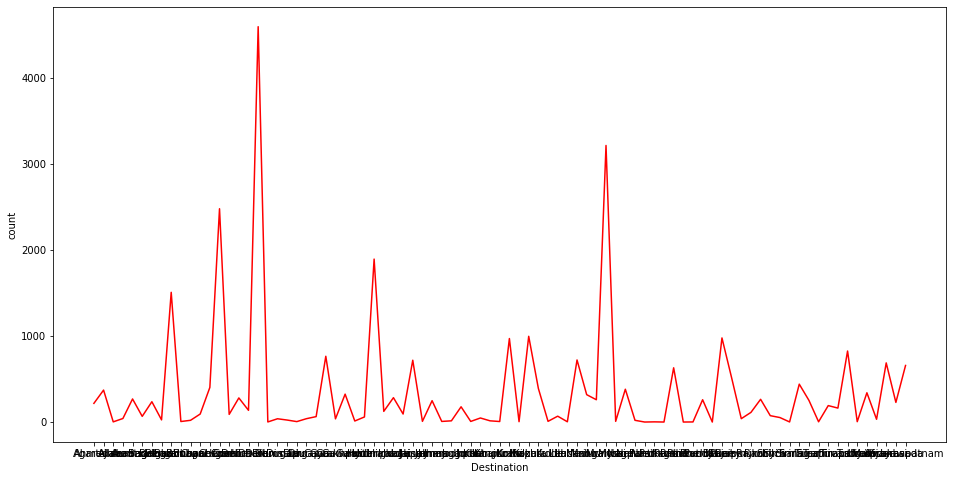

In [99]:
plt.figure(figsize=(16,8))
sns.lineplot(data=destn, x="Destination",y="count",color='red' )

In [59]:
city_count=flight_data.groupby("Source")["Uniq Id"].count().to_dict()
city_count

{'Abudhabi': 501,
 'Addis Ababa': 89,
 'Addu City': 2,
 'Agartala': 83,
 'Agatti Island': 6,
 'Agra': 1,
 'Ahmedabad': 1165,
 'Aizawl': 70,
 'Al Ain': 60,
 'Allahabad': 18,
 'Almaty': 45,
 'Amritsar': 400,
 'Amsterdam': 269,
 'Antalya': 86,
 'Ashgabat': 11,
 'Astana': 27,
 'Aurangabad': 14,
 'Bagdogra': 78,
 'Baghdad': 32,
 'Bahrain': 317,
 'Baku': 10,
 'Bangkok': 651,
 'Basra': 24,
 'Belgaum': 14,
 'Bengaluru': 1729,
 'Bhopal': 284,
 'Bhubaneswar': 575,
 'Bhuj': 7,
 'Birmingham': 80,
 'Bishkek': 14,
 'Brusells': 138,
 'Cairo': 56,
 'Chandigarh': 209,
 'Chennai': 452,
 'Chicago': 111,
 'Chittagong': 5,
 'Cochin': 61,
 'Coimbatore': 370,
 'Cologne': 79,
 'Colombo': 440,
 'Copenhagen': 44,
 'Dammam': 445,
 'Dehra Dun': 265,
 'Delhi': 1151,
 'Denpasar': 90,
 'Dhaka': 169,
 'Dharamsala': 6,
 'Dibrugarh': 17,
 'Dimapur': 4,
 'Don Mueang': 335,
 'Dubai': 1099,
 'Dushanbe': 15,
 'Frankfurt': 413,
 'Gaya': 10,
 'Goa': 549,
 'Gorakhpur': 21,
 'Guangzhou': 91,
 'Guwahati': 422,
 'Helnski': 50,
 

In [60]:
flight_data["Source Count"]= flight_data["Source"].map(city_count)

In [62]:
per_1= flight_data.shape[0]*0.005
per_1

150.12

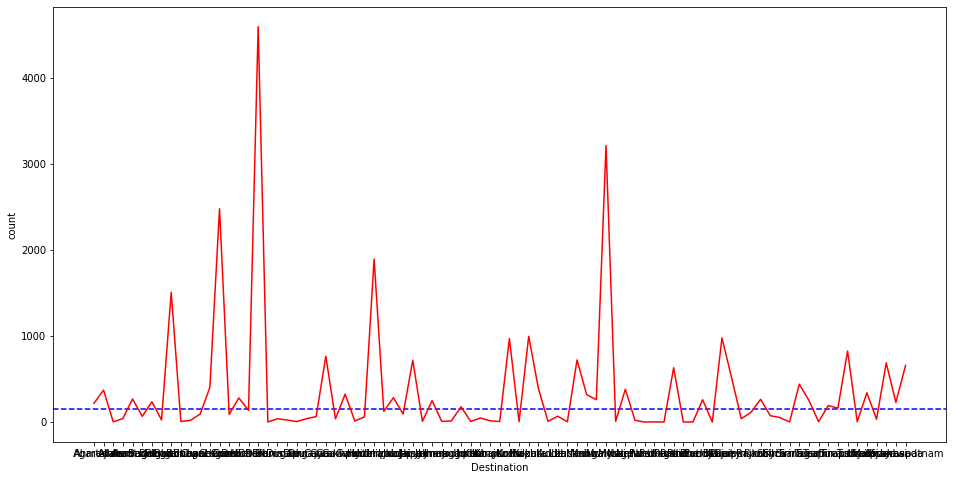

In [104]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='blue',linestyle='--')
sns.lineplot(data=destn, x="Destination",y="count",color='red' )

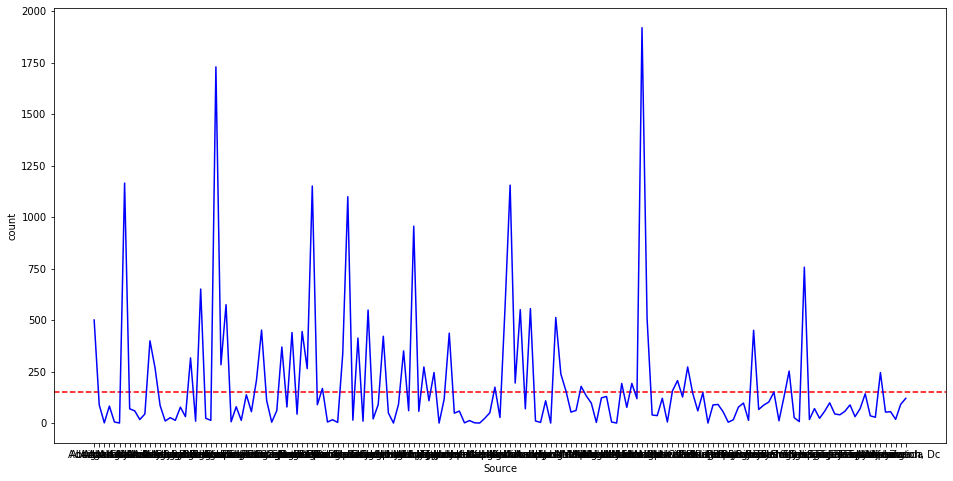

In [103]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='red',linestyle='--')
sns.lineplot(data=data, x="Source",y="count",color='blue' )

In [63]:
common_source=flight_data.loc[flight_data["Source Count"]>per_1]["Source"].unique().tolist()
common_source

['Dubai',
 'Delhi',
 'Mumbai',
 'Jeddah',
 'Kochi',
 'Bhopal',
 'Don Mueang',
 'Riyadh',
 'Bengaluru',
 'Guwahati',
 'Amritsar',
 'Kualalumpur',
 'Vadodara',
 'Dehra Dun',
 'Hong Kong',
 'Kolkata',
 'Kozhikode',
 'Hyderabad',
 'Bhubaneswar',
 'Paris',
 'Chandigarh',
 'Ahmedabad',
 'Singapore',
 'Bangkok',
 'Abudhabi',
 'Coimbatore',
 'Dammam',
 'Dhaka',
 'Bahrain',
 'Jaipur',
 'Chennai',
 'London',
 'Frankfurt',
 'Colombo',
 'Newark',
 'Kuwait',
 'Goa',
 'Lucknow',
 'Amsterdam',
 'Moscow',
 'Indore',
 'Muscat',
 'Sharjah',
 'Male',
 'Kathmandu',
 'New York',
 'Medina',
 'Seoul',
 'Luxembourg']

In [64]:
len(common_source)

49

In [66]:
source_encoder={
    val:id+1 for id,val in enumerate(common_source)
}
source_encoder

{'Abudhabi': 25,
 'Ahmedabad': 22,
 'Amritsar': 11,
 'Amsterdam': 39,
 'Bahrain': 29,
 'Bangkok': 24,
 'Bengaluru': 9,
 'Bhopal': 6,
 'Bhubaneswar': 19,
 'Chandigarh': 21,
 'Chennai': 31,
 'Coimbatore': 26,
 'Colombo': 34,
 'Dammam': 27,
 'Dehra Dun': 14,
 'Delhi': 2,
 'Dhaka': 28,
 'Don Mueang': 7,
 'Dubai': 1,
 'Frankfurt': 33,
 'Goa': 37,
 'Guwahati': 10,
 'Hong Kong': 15,
 'Hyderabad': 18,
 'Indore': 41,
 'Jaipur': 30,
 'Jeddah': 4,
 'Kathmandu': 45,
 'Kochi': 5,
 'Kolkata': 16,
 'Kozhikode': 17,
 'Kualalumpur': 12,
 'Kuwait': 36,
 'London': 32,
 'Lucknow': 38,
 'Luxembourg': 49,
 'Male': 44,
 'Medina': 47,
 'Moscow': 40,
 'Mumbai': 3,
 'Muscat': 42,
 'New York': 46,
 'Newark': 35,
 'Paris': 20,
 'Riyadh': 8,
 'Seoul': 48,
 'Sharjah': 43,
 'Singapore': 23,
 'Vadodara': 13}

In [69]:
null_for_source={
    "Source Encoded":0
}

In [68]:
flight_data["Source Encoded"]= flight_data["Source"].map(source_encoder)

In [70]:
flight_data.fillna(value=null_for_source, inplace=True)

In [73]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0


In [74]:
null_for_destn={
    "Destination Encoded":0
}

In [76]:
flight_data["Destination Encoded"]= flight_data["Destination"].map(source_encoder)
flight_data.fillna(value=null_for_destn, inplace=True)

In [78]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0


In [80]:
flight_data["Source Encoded"].corr(flight_data.Fare)

0.012550471652281564

In [81]:
flight_data["Destination Encoded"].corr(flight_data.Fare)

-0.04079053891944303

In [82]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0


In [83]:
flight_data["Fare"].corr(flight_data["Number Of Stops"])

0.1820248916928677

In [86]:
flight_data["S-D"]=flight_data["Source Encoded"]-flight_data["Destination Encoded"].abs()

In [87]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0


In [88]:
flight_data["Fare"].corr(flight_data["S-D"])

0.038121543746311624

In [89]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0


In [108]:
flight_data["Departure Date"]=flight_data["Departure Date"].astype("str")
flight_data["DepDay"]=pd.to_datetime(flight_data["Departure Date"]).dt.day
flight_data["Arrival Date"]=flight_data["Arrival Date"].astype("str")
flight_data["ArrDay"]=pd.to_datetime(flight_data["Arrival Date"]).dt.day

In [113]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,DepQuarter,ArrQuarter
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0,23,24,1,1,1,1


In [110]:

flight_data["DepMonth"]=pd.to_datetime(flight_data["Departure Date"]).dt.month

flight_data["ArrMonth"]=pd.to_datetime(flight_data["Arrival Date"]).dt.month

In [118]:
flight_data.DepMonth.value_counts()

1    15670
2    14354
Name: DepMonth, dtype: int64

In [112]:

flight_data["DepWeek"]=pd.to_datetime(flight_data["Departure Date"]).dt.quarter

flight_data["ArrWeek"]=pd.to_datetime(flight_data["Arrival Date"]).dt.quarter

In [119]:
flight_data.DepQuarter.value_counts()

1    30024
Name: DepQuarter, dtype: int64

In [120]:
day_count=flight_data.groupby("DepDay")["Uniq Id"].agg({"count"})

In [121]:
day_count

,count
DepDay,
1,1363
2,867
3,1527
4,815
6,2451
8,1552
9,874
10,1623
11,824


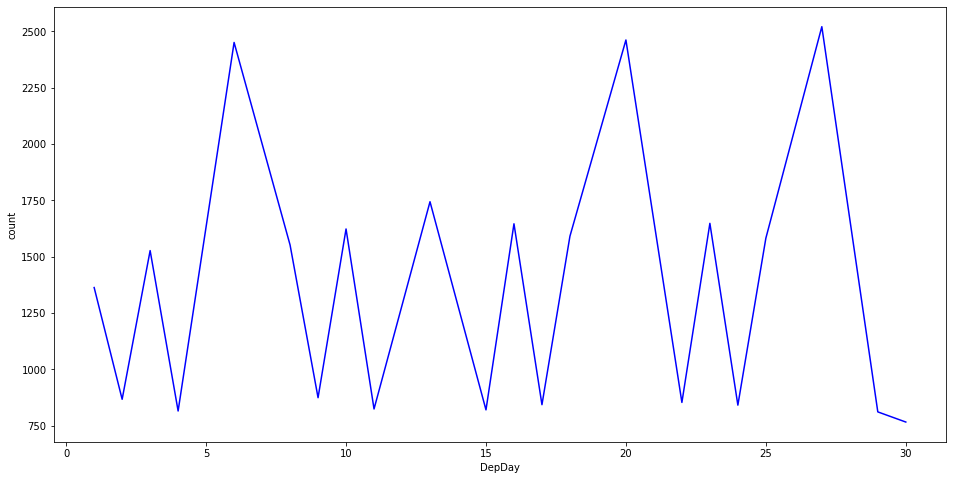

In [123]:
plt.figure(figsize=(16,8))

sns.lineplot(data=day_count, x="DepDay",y="count",color='blue' )

In [124]:
flight_data["Fare"].corr(flight_data["DepDay"])

-0.04408004603290045